# Model supergostega kodiranja

Kvantno supergosto kodiranje je protokol, kjer 2 klasična bita informacije prenesemo s pomočjo le enega kubita in prepletenega stanja.
Ideja izvira od Charles Bennett (IBM) in Stephen Wiesner (1992).

Protokol začne s prepletenim stanje med Alice (posiljatelj) in Bob(prejemnik)
$\ket{\phi}=\frac{1}{\sqrt{2}}[\ket{00}+\ket{11}],$
kjer prvi kubit pripada Alice in drugi Bobu.

Alice bi rada poslala sporočilo z 2 klasičnima bitoma informacije, torej 00, 01, 10 ali 11. Alice naredi enokubitno operacijo glede na sporočilo, ki bi ga rada poslala.
Ima 4 moznosti:

- Za sporočilo 00 Alice ne naredi nič
- Za sporočilo 01, Alice aplicira vrata Z
- Za sporočilo 10, Alice aplicira vrata X
- Za sporočilo 11, Alice aplicira vrati X in potem Z
 

Glavno ideja supergostega kodiranja je da so 4 končna stanja [Bellova stanja] ortogonalna in jih z meritvijo popolnoma razločimo.

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

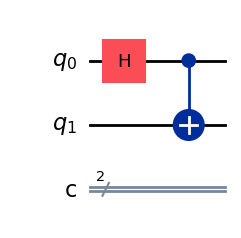

In [3]:
# Pripravi vezje:  2 kubita in 2 bita
qc = QuantumCircuit(2,2)

qc.h(0)
qc.cx(0,1)

qc.draw("mpl")

Alice se odloči katero sporočilo bi rada poslala. V konkretnem primeru bomo izbrali sporocilo 11. Na koncu prenesemo 

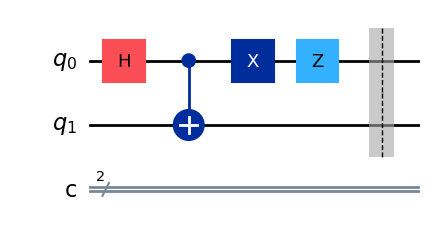

In [4]:
# Sporočilo
bit2="11"


if bit2=="00":
    pass
elif bit2=="01":
    qc.z(0)
elif bit2=="10":
    qc.z(0)
elif bit2=="11":
    qc.x(0)
    qc.z(0)

qc.barrier() #Barrier je trenutno samo vizualni element, da razločimo Alice in Bob aplikacije
qc.draw("mpl")

Bob mora dekodirati sporočilo in to naredi z konjigiranim vezjem Alice.

Najprej aplicira CNOT vrata in potem Hadammar vrata.

Na koncu izmeri stanje obeh kubitov.

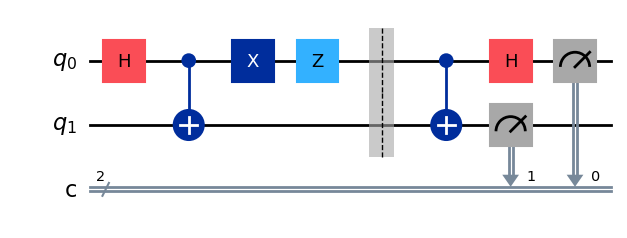

In [5]:
qc.cx(0,1)
qc.h(0)

qc.measure(0,0)
qc.measure(1,1)
qc.draw("mpl")

Poglejmo kak Bob izmeri

{'11': 2048}


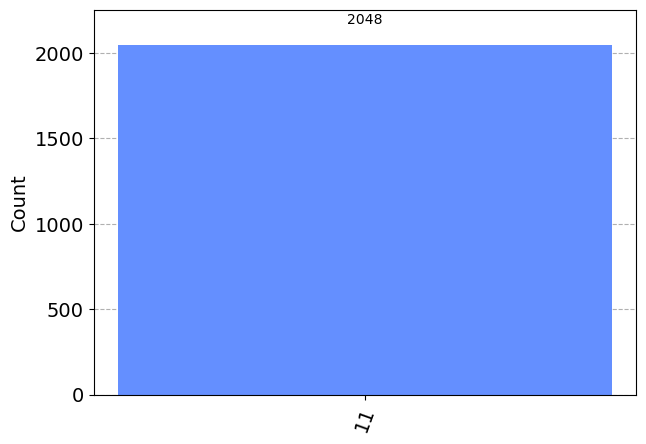

In [6]:
from qiskit import transpile 
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

backend = AerSimulator()

# Prvo prevedemo celotno vezje v low-level instrukcije za simulator
qc_compiled = transpile(qc, backend)

# Izvrednotimo vezje in naredimo 2048 ponovitev
job_sim = backend.run(qc_compiled, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()



counts = result_sim.get_counts(qc_compiled)
print(counts)

plot_histogram(counts)

Res izmeri v vseh primerih stanje 11, ki mu ga je poslala Alice.